<a href="https://colab.research.google.com/github/maschu09/mless/blob/main/time_series_forecasting/7_multi_model_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Check for causality

😈 **Task 3:** Run a Granger test between `temp` and `o3`. Is there any directional causality?

😈 **Question 3:** Why is Granger causality not the same as actual causality?


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for col in ["no2", "temp", "no", "press"]:
    print(f"\nTesting if {col} Granger-causes o3:")
    grangercausalitytests(dataframe[['o3', col]], maxlag=4)


Testing if no2 Granger-causes o3:


NameError: name 'dataframe' is not defined

#Author: Ann Weitz

In [1]:
# Mount colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd

def plot_timeseries_results(timeseries, model_forecasts, var_name):
  """
  Plots the predictions of multiple models against the context window and ground truth of a timeseries.
  args:
    timeseries (pandas.DataFrame): DataFrame for the original timeseries
    model_forecasts (List: (str, pandas.DataFrame)): List containing the models names and their prediction results
    var_name (str): Name of the field that contains the actual data.
  """

  plt.figure(figsize = (18,10))

  # Get the point where context window ends and predictions start, then separate the timeseries
  prediction_start = model_forecasts[0][1]["timestep"].iloc[0]
  context_window_df = timeseries[timeseries["timestep"] < prediction_start]
  ground_truth_df = timeseries[timeseries["timestep"] >= prediction_start]

  # Plot context window and ground truth
  plt.plot(context_window_df["timestep"], context_window_df[var_name], label = "Context window", color = "blue", marker = "o")
  plt.plot(ground_truth_df["timestep"], ground_truth_df[var_name], label="Ground Truth", color="green", marker = "o")

  # Plot the different models
  for model_name, df in model_forecasts:
    plt.plot(df["timestep"], df[var_name], label = model_name, marker = "x")

  plt.xlabel("Timestep")
  plt.ylabel(var_name)
  plt.title(f"Actual vs. predicted {var_name}")
  plt.legend()
  plt.tight_layout()
  plt.show()


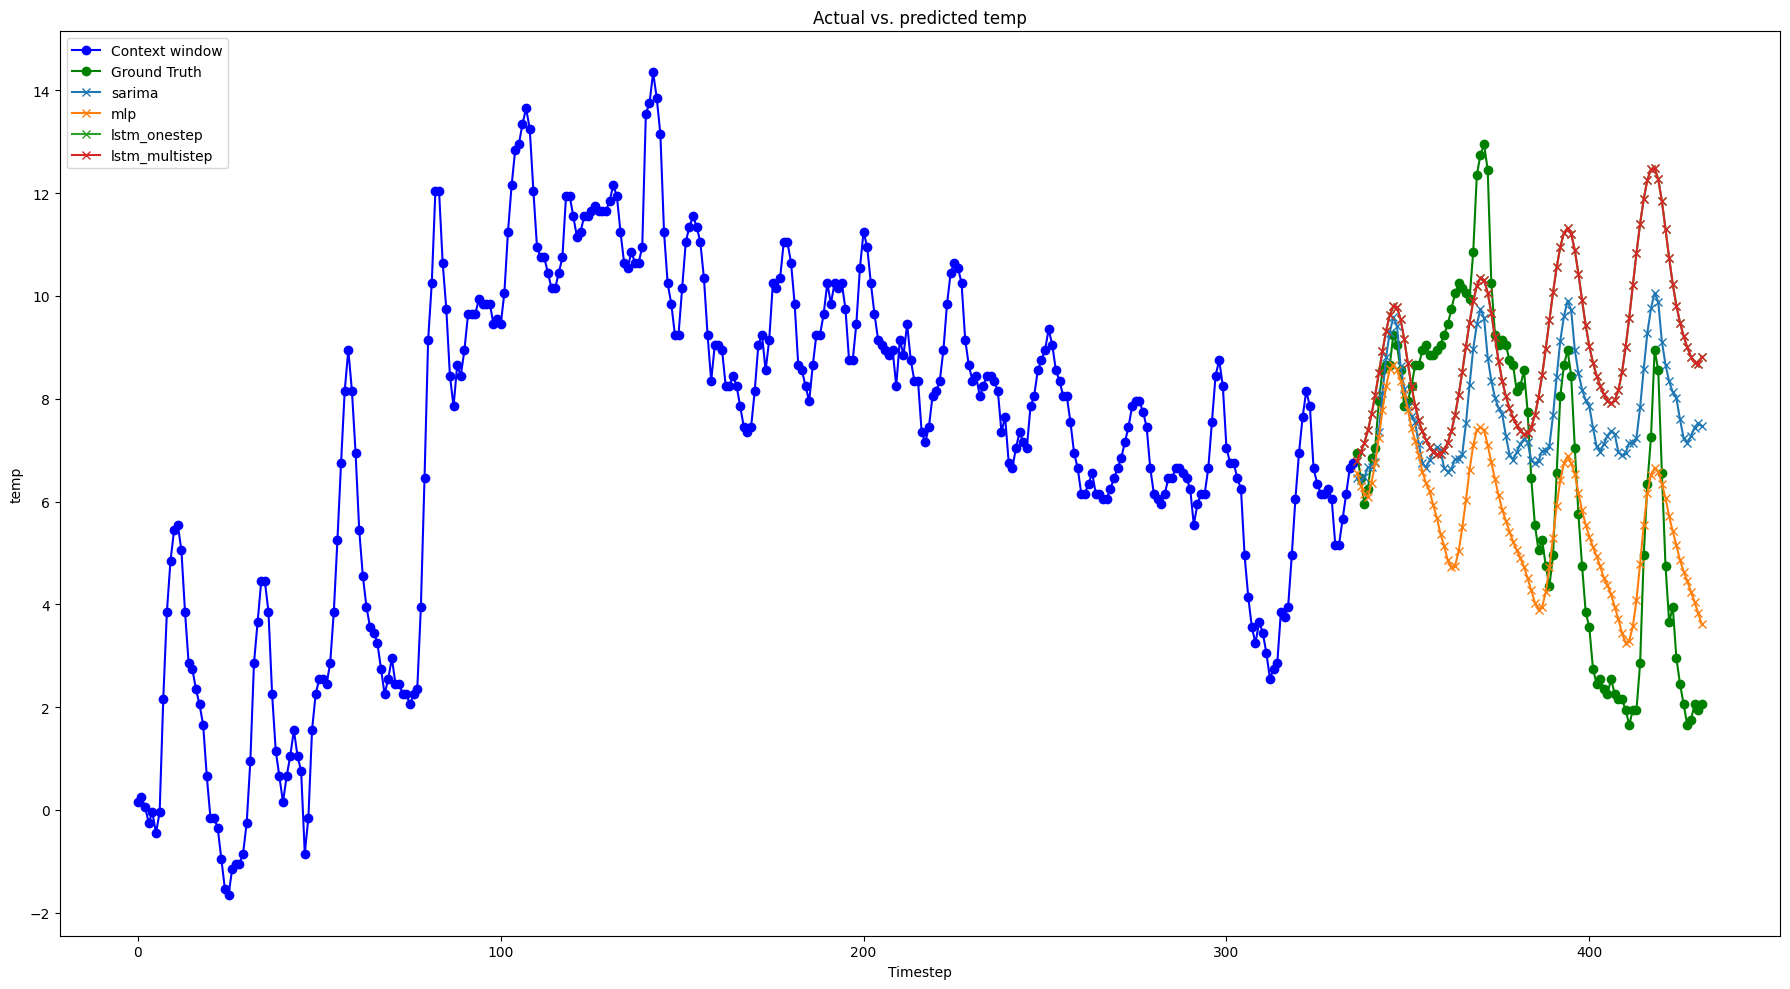

In [ ]:
# Renaming from value to temp, so it's clear what value is displayed
# Get result file paths
results_dir = "/content/drive/MyDrive/timeseries_data/"
results_files = [f for f in os.listdir(results_dir) if f.endswith('_results.csv')]

# Load timeseries file
timeseries = pd.read_csv(os.path.join(results_dir, "sample.csv"))
timeseries.rename({"value": "temp"}, axis="columns", inplace=True)

# Open all result files and save them with model name in a list
model_forecasts = []
for results_file in results_files:
  df = pd.read_csv(os.path.join(results_dir,results_file))

  df.rename({"value": "temp"}, axis="columns", inplace=True)
  model_name = results_file.replace("_results.csv","")
  model_forecasts.append((model_name, df))

# Plot everything
plot_timeseries_results(timeseries, model_forecasts, "temp")

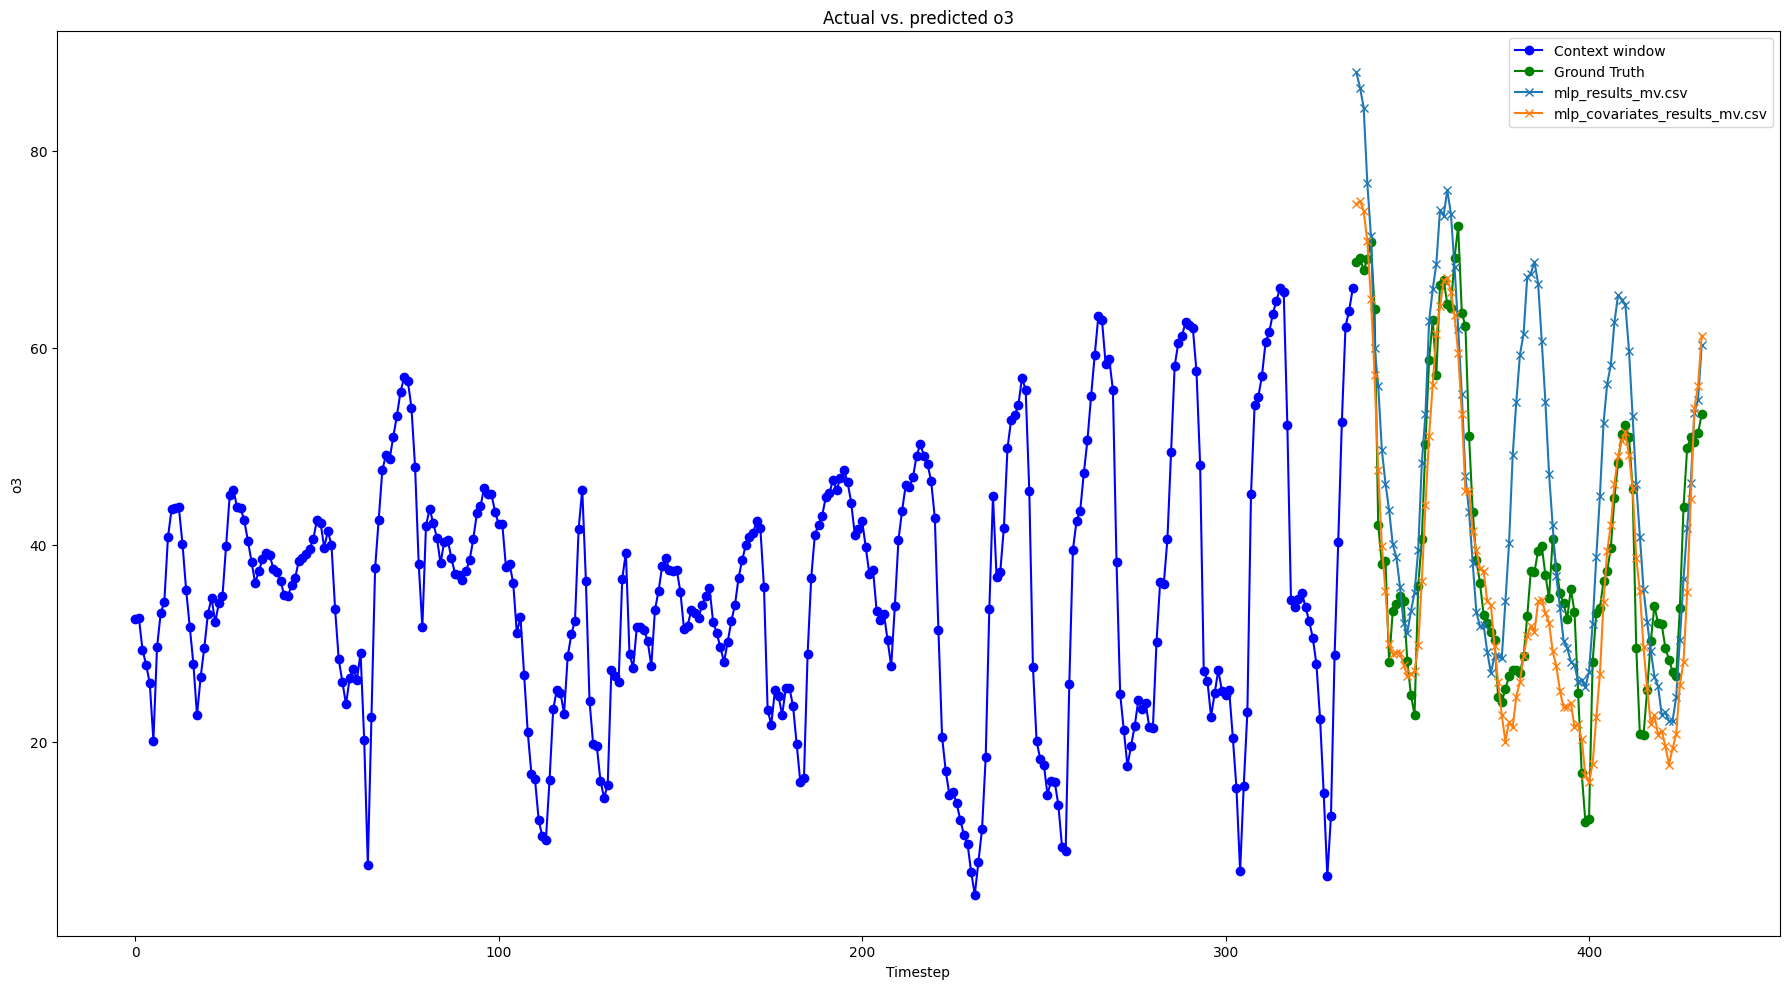

In [4]:
# Renaming from value to o3, so it's clear what value is displayed
# Get result file paths
results_dir = "/content/drive/MyDrive/timeseries_data/mv/"
results_files = [f for f in os.listdir(results_dir) if f.endswith('_results_mv.csv')]

# Load timeseries file
timeseries = pd.read_csv(os.path.join(results_dir, "sample.csv"))
timeseries.rename({"value": "o3"}, axis="columns", inplace=True)

# Open all result files and save them with model name in a list
model_forecasts = []
for results_file in results_files:
  df = pd.read_csv(os.path.join(results_dir,results_file))

  df.rename({"value": "o3"}, axis="columns", inplace=True)
  model_name = results_file.replace("_results.csv","")
  model_forecasts.append((model_name, df))

# Plot everything
plot_timeseries_results(timeseries, model_forecasts, "o3")

In this notebook, we build a function to display and compare the data of multiple different models, that can be reused for different purposes. Here we use it to display the results from the models, that were given to us and the two multivariate models we built ourselves.

The first plot contains the data for following models:
* SARIMA
* MLP
* LSTM One-Step
* LSTM Multi-Step
* (PatchTST is missing, because I couldnt get the function to load the custom sampled data to work, so the plot wouldnt be comparable to these)

Both LSTM models only have really minor differences, which makes it look like the one-step model is absent from the graph, but they are super-imposed on each other.

The second plot contains the data for the following models:
* multivariate MLP
* multivariate MLP with known future covariates.

While the first model is already doing pretty okay, the second one is quite a bit better, with quite a close curve to the ground truth for the first 48 hours, before diverging a bit more in the latter 48 hours. This is also somewhat in line with the findings from the [IntelliO3 paper.](https://gmd.copernicus.org/articles/14/1/2021)